In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Univariant Analysis

(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <BarContainer object of 10 artists>)

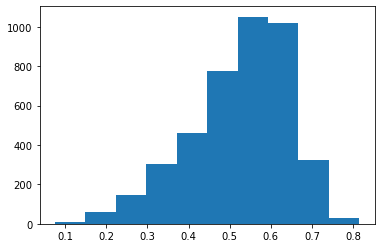

In [4]:
plt.hist(data["Length"])

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

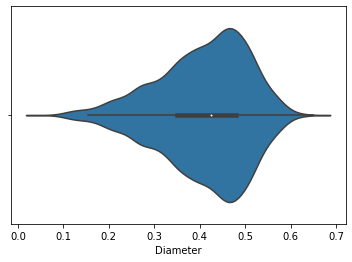

In [5]:
sns.violinplot(data["Diameter"])

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

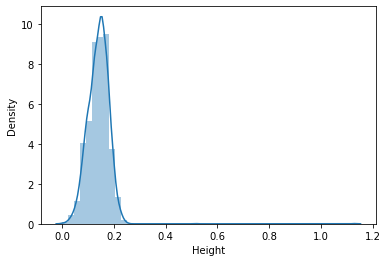

In [6]:
sns.distplot(data["Height"])

<AxesSubplot:xlabel='Viscera weight'>

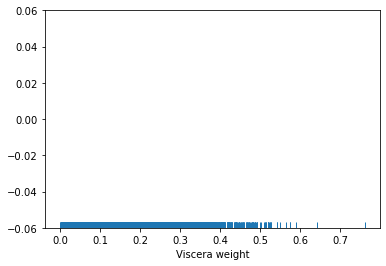

In [7]:
sns.rugplot(data["Viscera weight"])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

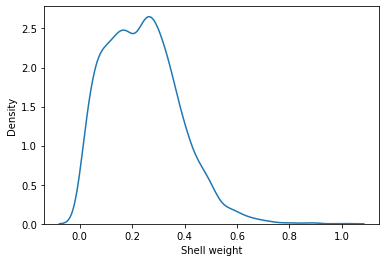

In [8]:
sns.kdeplot(data["Shell weight"])

Bivariant Analysis

<AxesSubplot:>

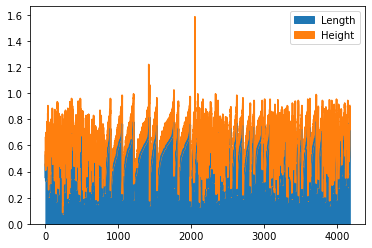

In [9]:
data.iloc[:,1:4:2].plot.area()

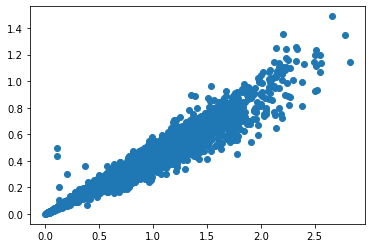

In [10]:
plt.scatter(data["Whole weight"],data["Shucked weight"])

Multivariant Analysis

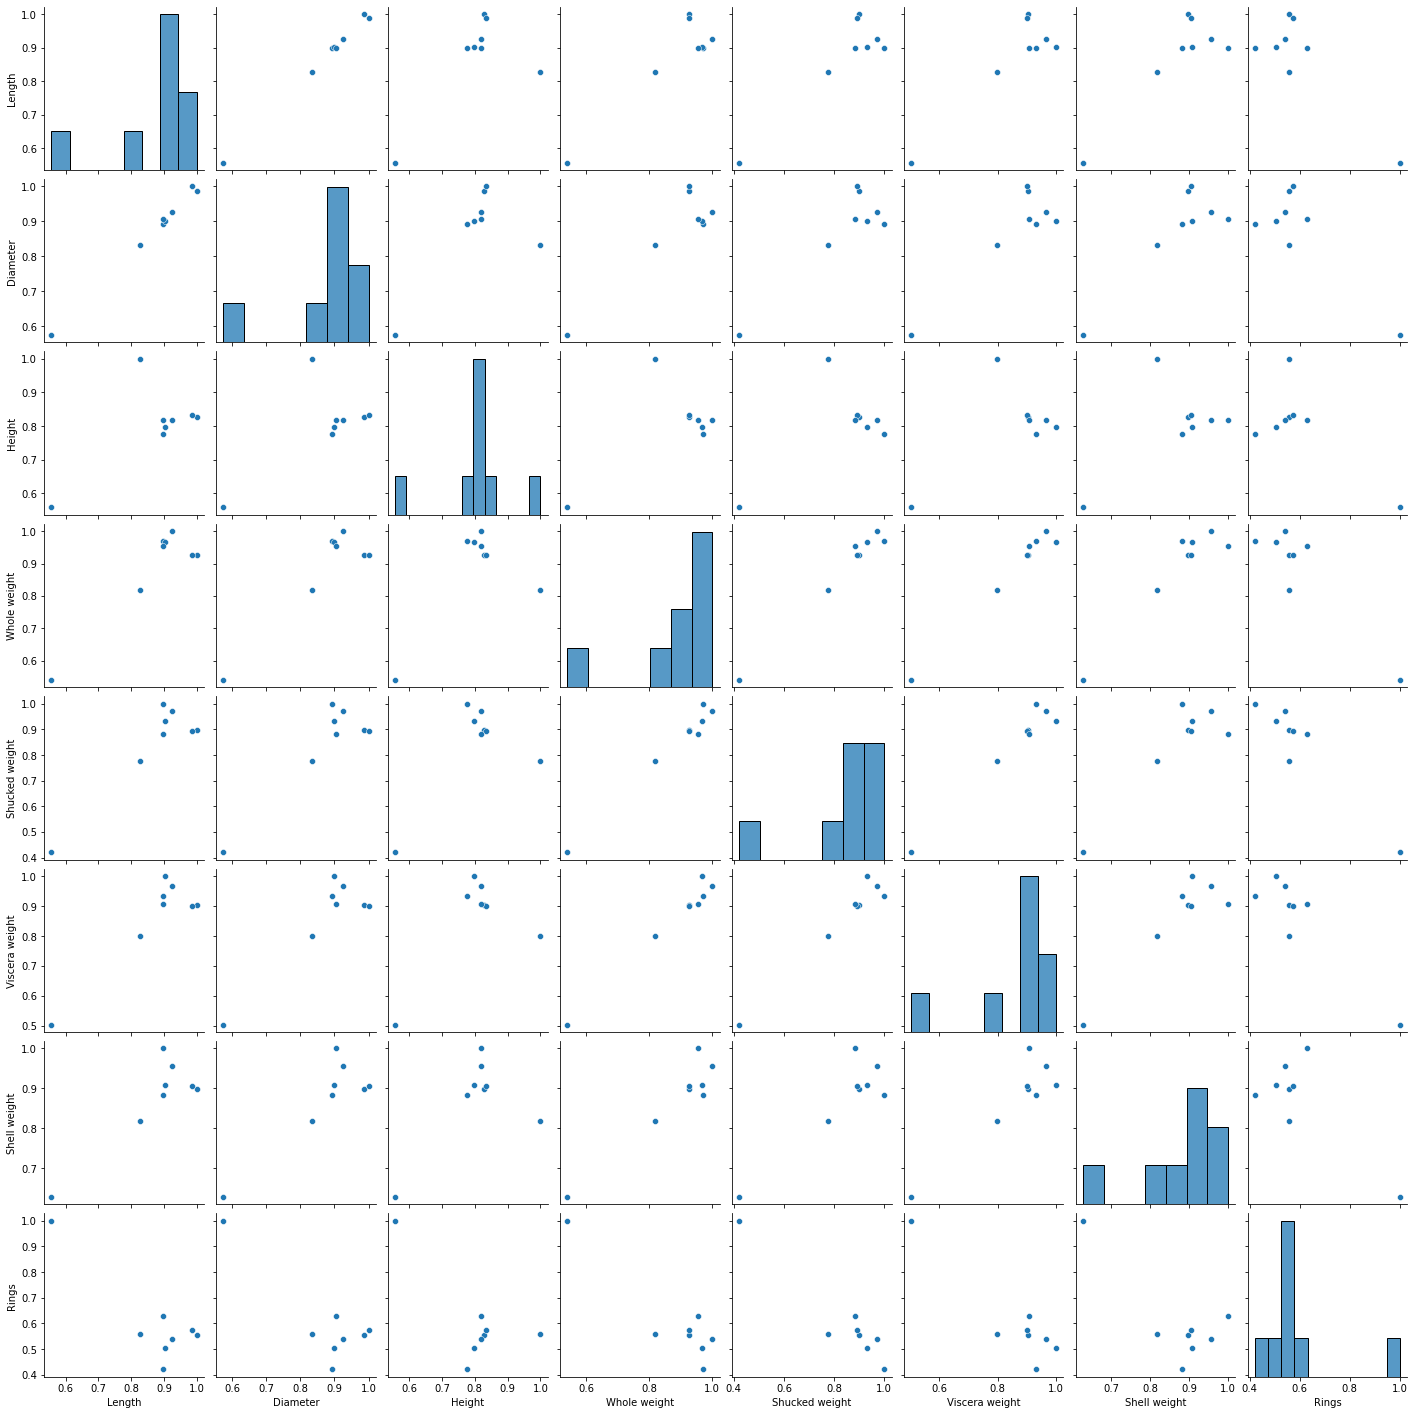

In [11]:
sns.pairplot(data.corr())

Descriptive Statistics

In [12]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
data.median()

C:\Users\sathish kumar\AppData\Local\Temp\ipykernel_13576\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [14]:
data.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Handling Missing Values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Handling Outliers

In [17]:
data['Length'] = np.where(data['Length']>0.86250, 0.1650, data['Length'])
data['Diameter'] = np.where(data['Diameter']>0.67500, 0.1300, data['Diameter'])
data['Height'] = np.where(data['Height']>0.24000, 0.0500, data['Height'])
data['Whole weight'] = np.where(data['Whole weight']>2.22025, 0.7115, data['Whole weight'])
data['Shucked weight'] = np.where(data['Shucked weight']>0.97600, 0.3160, data['Shucked weight'])
data['Viscera weight'] = np.where(data['Viscera weight']>0.49225, 0.1595, data['Viscera weight'])
data['Shell weight'] = np.where(data['Shell weight']>0.62750, 0.1990, data['Shell weight'])
data['Rings'] = np.where(data['Rings']>15.50000, 3.0000, data['Rings'])

In [18]:
qnt = data.quantile(q=[0.25, 0.75])
Q1 = qnt.iloc[0]
Q3 = qnt.iloc[1]
iqr = Q3 - Q1
print(iqr)
upper = qnt.iloc[1] - 1.5*iqr
print(upper)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7000
Shucked weight    0.3085
Viscera weight    0.1560
Shell weight      0.1935
Rings             4.0000
dtype: float64
Length            0.36750
Diameter          0.28500
Height            0.09000
Whole weight      0.09150
Shucked weight    0.03175
Viscera weight    0.01550
Shell weight      0.03325
Rings             5.00000
dtype: float64


In [19]:
data['Length'] = np.where(data['Length']<0.36750, 0.1650, data['Length'])
data['Diameter'] = np.where(data['Diameter']<0.28500, 0.1300, data['Diameter'])
data['Height'] = np.where(data['Height']<0.09000, 0.0500, data['Height'])
data['Whole weight'] = np.where(data['Whole weight']<0.14550, 0.6640, data['Whole weight'])
data['Shucked weight'] = np.where(data['Shucked weight']<0.05050, 0.2960, data['Shucked weight'])
data['Viscera weight'] = np.where(data['Viscera weight']<0.02450, 0.1500, data['Viscera weight'])
data['Shell weight'] = np.where(data['Shell weight']<0.05575, 0.1785, data['Shell weight'])
data['Rings'] = np.where(data['Rings']<5.00000, 4.0000, data['Rings'])

<AxesSubplot:>

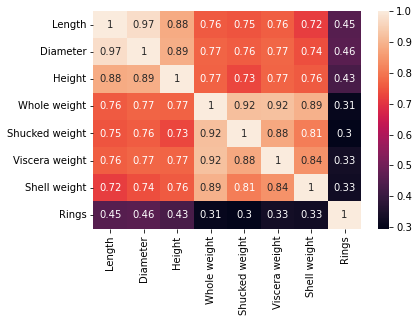

In [20]:
sns.heatmap(data.corr(), annot=True)

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

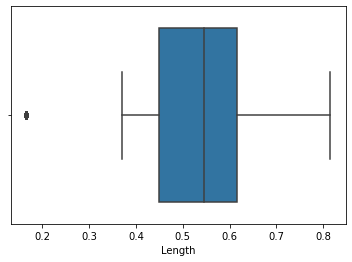

In [21]:
sns.boxplot(data["Length"])

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

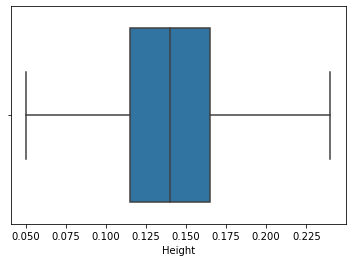

In [22]:
sns.boxplot(data["Height"])

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

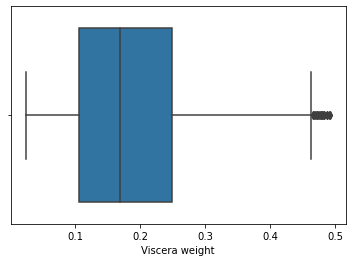

In [23]:
sns.boxplot(data["Viscera weight"])

C:\Users\sathish kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

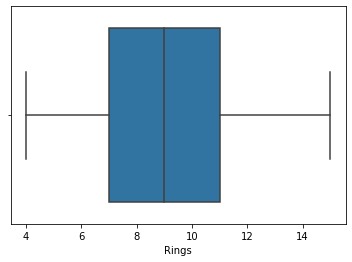

In [24]:
sns.boxplot(data["Rings"])

Categorical Column Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2,0.165,0.130,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1,0.165,0.130,0.050,0.2050,0.0895,0.0395,0.1785,7.0


Split the data into dependent and independent variables

In [26]:
x = data.iloc[:, :-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.165,0.130,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.165,0.130,0.050,0.2050,0.0895,0.0395,0.1785
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [27]:
y = data.iloc[:, -1]
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

Scale the independent variables

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [29]:
x

array([[ 1.15198011, -0.36114161, -0.24881031, ..., -0.71474626,
        -0.83006218, -0.81440935],
       [ 1.15198011, -2.29364888, -2.16232114, ..., -1.35965189,
        -1.35464984, -1.48906691],
       [-1.28068972,  0.13864475,  0.19903265, ..., -0.54965042,
        -0.42538027, -0.30841618],
       ...,
       [ 1.15198011,  0.60511202,  0.64687561, ...,  0.83818648,
         1.03347304,  0.51803933],
       [-1.28068972,  0.77170748,  0.72830161, ...,  0.86656233,
         0.76868117,  0.41684069],
       [ 1.15198011,  1.33813202,  1.29828356, ...,  3.00506938,
         1.92277402,  2.09505136]])

Split the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [31]:
x_train.shape

(3341, 8)

In [32]:
x_test.shape

(836, 8)

Build the Model

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x)

Train the Model

In [34]:
from sklearn.linear_model import LinearRegression
polynomi_reg = LinearRegression()
polynomi_reg.fit(x_poly, y)

LinearRegression()

Test the Model

In [35]:
predict = polynomi_reg.predict(x_poly)

Measure the performance using Metrics

In [36]:
from sklearn.metrics import r2_score
r2_score(y, predict)

0.6263681794233544

In [37]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, predict))

1.6315371691029257